# Forecasting - Facebook Prophet
https://facebook.github.io/prophet/

https://research.fb.com/blog/2017/02/prophet-forecasting-at-scale/

https://peerj.com/preprints/3190.pdf

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt





%matplotlib inline
mpl.rcParams['figure.figsize'] = (16, 10)
pd.set_option('display.max_rows', 500)

import plotly.graph_objects as go

In [2]:

#attention might have problems with holiday package, 
#downgrate holidays via: pip install 'holidays==0.9.12'
from fbprophet import Prophet 

In [3]:
%matplotlib inline
plt.style.use('fivethirtyeight')

In [4]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Trivial Forecast (rolling mean)

In [5]:
# the final trivial model is at the end of this file

df = pd.DataFrame({'X': np.arange(0,10)}) # generate an input df
df['y']=df.rolling(3).mean() # take the window and write the average as the result

In [6]:
df

X    y
0  0  NaN
1  1  NaN
2  2  1.0
3  3  2.0
4  4  3.0
5  5  4.0
6  6  5.0
7  7  6.0
8  8  7.0
9  9  8.0

# Small data set

In [10]:
df_all = pd.read_csv('../data/processed/COVID_small_flat_table.csv',sep=';')
df=df_all[['date','Germany']]
df=df.rename(columns={'date': 'ds',
                        'Germany': 'y'})
df_all

date   Italy      US   Spain  Germany  Korea, South
0   2020-01-22       0       1       0        0             1
1   2020-01-23       0       1       0        0             1
2   2020-01-24       0       2       0        0             2
3   2020-01-25       0       2       0        0             2
4   2020-01-26       0       5       0        0             3
5   2020-01-27       0       5       0        1             4
6   2020-01-28       0       5       0        4             4
7   2020-01-29       0       5       0        4             4
8   2020-01-30       0       5       0        4             4
9   2020-01-31       2       7       0        5            11
10  2020-02-01       2       8       1        8            12
11  2020-02-02       2       8       1       10            15
12  2020-02-03       2      11       1       12            15
13  2020-02-04       2      11       1       12            16
14  2020-02-05       2      11       1       12            19
15  2020-02-06       2      11       1       12            23
16  2020-02-07       3      11       1       13            24
17  2020-02-08       3      11       1       13            24
18  2020-02-09       3      11       2       14            25
19  2020-02-10       3      11       2       14            27
20  2020-02-11       3      12       2       16            28
21  2020-02-12       3      12       2       16            28
22  2020-02-13       3      13       2       16            28
23  2020-02-14       3      13       2       16            28
24  2020-02-15       3      13       2       16            28
25  2020-02-16       3      13       2       16            29
26  2020-02-17       3      13       2       16            30
27  2020-02-18       3      13       2       16            31
28  2020-02-19       3      13       2       16            31
29  2020-02-20       3      13       2       16           104
30  2020-02-21      20      15       2       16           204
31  2020-02-22      62      15       2       16           433
32  2020-02-23     155      15       2       16           602
33  2020-02-24     229      51       2       16           833
34  2020-02-25     322      51       6       17           977
35  2020-02-26     453      57      13       27          1261
36  2020-02-27     655      58      15       46          1766
37  2020-02-28     888      60      32       48          2337
38  2020-02-29    1128      68      45       79          3150
39  2020-03-01    1694      74      84      130          3736
40  2020-03-02    2036      98     120      159          4335
41  2020-03-03    2502     118     165      196          5186
42  2020-03-04    3089     149     222      262          5621
43  2020-03-05    3858     217     259      482          6088
44  2020-03-06    4636     262     400      670          6593
45  2020-03-07    5883     402     500      799          7041
46  2020-03-08    7375     518     673     1040          7314
47  2020-03-09    9172     583    1073     1176          7478
48  2020-03-10   10149     959    1695     1457          7513
49  2020-03-11   12462    1281    2277     1908          7755
50  2020-03-12   12462    1663    2277     2078          7869
51  2020-03-13   17660    2179    5232     3675          7979
52  2020-03-14   21157    2727    6391     4585          8086
53  2020-03-15   24747    3499    7798     5795          8162
54  2020-03-16   27980    4632    9942     7272          8236
55  2020-03-17   31506    6421   11748     9257          8320
56  2020-03-18   35713    7783   13910    12327          8413
57  2020-03-19   41035   13747   17963    15320          8565
58  2020-03-20   47021   19273   20410    19848          8652
59  2020-03-21   53578   25600   25374    22213          8799
60  2020-03-22   59138   33276   28768    24873          8961
61  2020-03-23   63927   43843   35136    29056          8961
62  2020-03-24   69176   53736   39885    32986          9037
63  2020-03-25   74386   65778   49515    

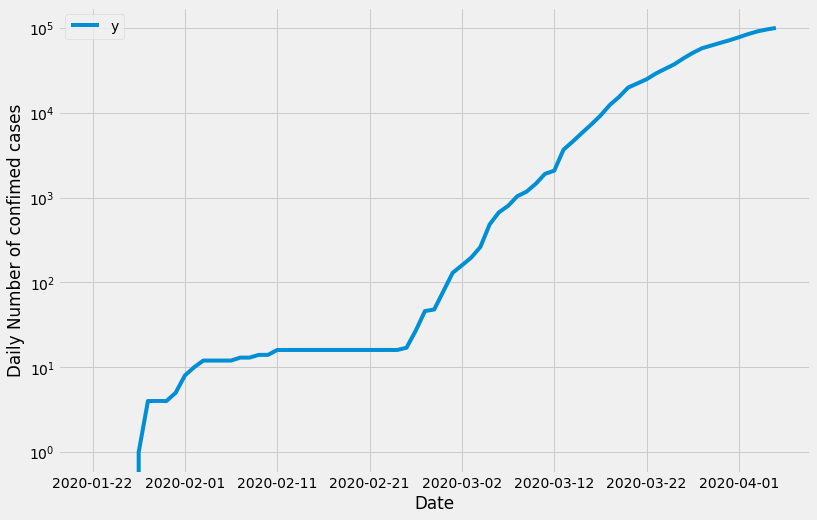

In [10]:
ax = df.set_index('ds').plot(figsize=(12, 8),
                             logy=True)
ax.set_ylabel('Daily Number of confimed cases')
ax.set_xlabel('Date')

plt.show()


In [47]:
# set the uncertainty interval to 95% (the Prophet default is 80%)

#my_model = Prophet(interval_width=0.95) # piecwise linear model
my_model = Prophet(growth='logistic')   # logistic model

In [48]:
# the column 'cap' is only mandatory for the logistic model
df['cap']=1000000.
my_model.fit(df)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/kienlef/opt/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [50]:
# define the periods and the frequency 'D'== days

future_dates = my_model.make_future_dataframe(periods=7, freq='D')
future_dates['cap']=1000000. # only mandatory for the logistic model
future_dates.tail()

ds        cap
77 2020-04-08  1000000.0
78 2020-04-09  1000000.0
79 2020-04-10  1000000.0
80 2020-04-11  1000000.0
81 2020-04-12  1000000.0

In [51]:
# predict according to the scikit-learn standard

forecast = my_model.predict(future_dates)

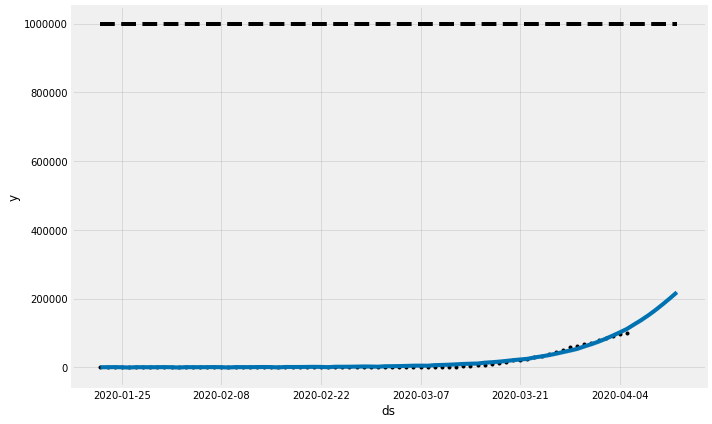

In [52]:
my_model.plot(forecast,
              uncertainty=True ); # since fbprohet is rendering the output

In [53]:
import plotly.offline as py
from fbprophet.plot import plot_plotly

fig = plot_plotly(my_model, forecast)  # This returns a plotly Figure

fig.update_layout(
    width=1024,
    height=900,
    xaxis_title="Time",
    yaxis_title="Confirmed infected people (source johns hopkins csse, log-scale)",
)
fig.update_yaxes(type="log",range=[1.1,5.5])
py.iplot(fig)

In [54]:
forecast.sort_values(by='ds').head()

ds      trend        cap   yhat_lower   yhat_upper  trend_lower  \
0 2020-01-22  29.024749  1000000.0 -4147.009656  4374.156062    29.024749   
1 2020-01-23  32.505586  1000000.0 -4367.361924  4605.010584    32.505586   
2 2020-01-24  36.403853  1000000.0 -3964.908160  4647.491978    36.403853   
3 2020-01-25  40.769604  1000000.0 -4210.144070  4386.733981    40.769604   
4 2020-01-26  45.658897  1000000.0 -5233.923440  3896.471215    45.658897   

   trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0    29.024749       40.425749             40.425749             40.425749   
1    32.505586      145.765627            145.765627            145.765627   
2    36.403853      342.535003            342.535003            342.535003   
3    40.769604      -28.073419            -28.073419            -28.073419   
4    45.658897     -814.950570           -814.950570           -814.950570   

       weekly  weekly_lower  weekly_upper  multiplicative_terms  \
0   40.425749     40.425749     40.425749                   0.0   
1  145.765627    145.765627    145.765627                   0.0   
2  342.535003    342.535003    342.535003                   0.0   
3  -28.073419    -28.073419    -28.073419                   0.0   
4 -814.950570   -814.950570   -814.950570                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper        yhat  
0                         0.0                         0.0   69.450497  
1                         0.0                         0.0  178.271213  
2                         0.0                         0.0  378.938856  
3                         0.0                         0.0   12.696185  
4                         0.0                         0.0 -769.291672

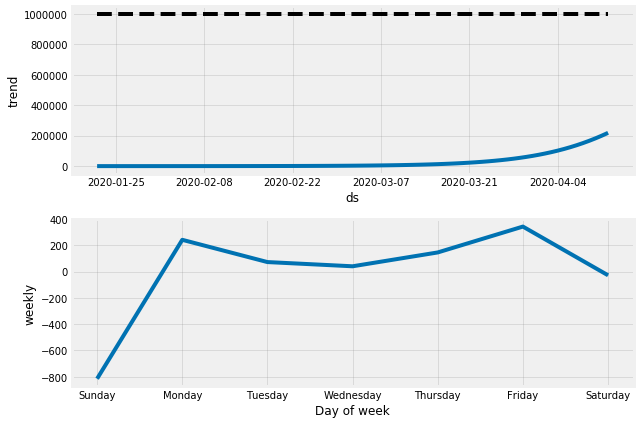

In [55]:
my_model.plot_components(forecast);

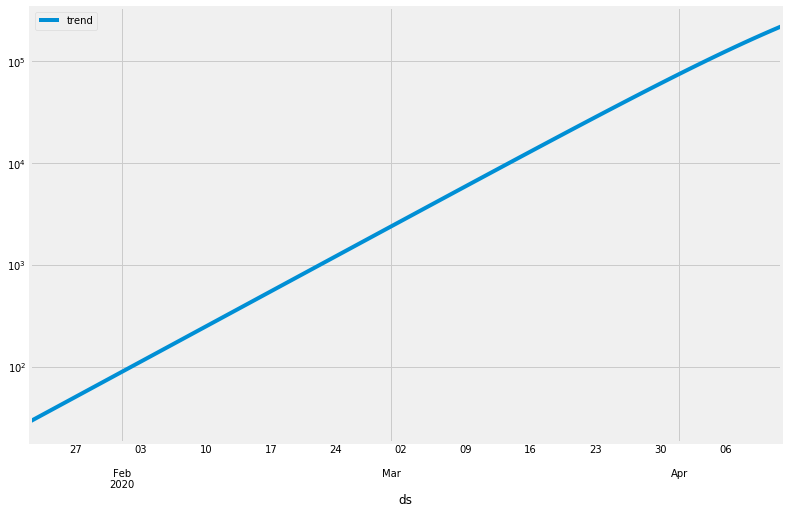

In [56]:
forecast[['ds','trend']].set_index('ds').plot(figsize=(12, 8),logy=True)

# Cross-Validation

In [75]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(my_model, 
                         initial='40 days', # we take the first 30 days for training
                         period='1 days',  # every  days a new prediction run
                         horizon = '7 days') #we predict 7days into the future

INFO:fbprophet:Making 28 forecasts with cutoffs between 2020-03-02 00:00:00 and 2020-03-29 00:00:00
/Users/kienlef/opt/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [76]:
df_cv.sort_values(by=['cutoff','ds'])[0:12]
df_cv.head()

ds      yhat  yhat_lower  yhat_upper    y     cutoff
0 2020-03-03 -1.394040  -39.890079   43.565468  196 2020-03-02
1 2020-03-04 -2.115313  -44.818734   40.700973  262 2020-03-02
2 2020-03-05  1.280726  -44.148178   43.967962  482 2020-03-02
3 2020-03-06  2.171446  -39.640079   49.061481  670 2020-03-02
4 2020-03-07  8.055175  -36.369678   51.319176  799 2020-03-02

In [77]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)

In [78]:
# the performance matrix shows the result for all horizon
df_p

horizon           mse          rmse           mae      mape     mdape  \
0  1 days  1.104050e+07   3322.724439   2001.669144  0.178623  0.132231   
1  2 days  3.599883e+07   5999.902679   3701.434783  0.238237  0.190665   
2  3 days  9.042618e+07   9509.267991   6075.096296  0.306168  0.253955   
3  4 days  1.961781e+08  14006.359095   9238.480765  0.381395  0.346233   
4  5 days  3.922768e+08  19805.978903  13453.862771  0.458933  0.420061   
5  6 days  7.430179e+08  27258.354439  18994.558591  0.554278  0.554946   
6  7 days  1.346240e+09  36691.146926  26138.951678  0.659315  0.692649   

   coverage  
0  0.035714  
1  0.035714  
2  0.035714  
3  0.000000  
4  0.000000  
5  0.000000  
6  0.000000

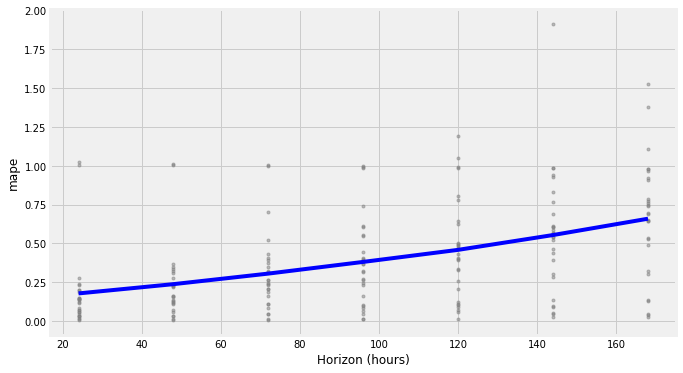

In [79]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape',)

# Diagonalplot 

### gives a good understanding for the under and over estimation w.r.t. magnitude 

In [80]:
horizon='7 days'
df_cv['horizon']=df_cv.ds-df_cv.cutoff

date_vec=df_cv[df_cv['horizon']==horizon]['ds']
y_hat=df_cv[df_cv['horizon']==horizon]['yhat']
y=df_cv[df_cv['horizon']==horizon]['y']

In [81]:
df_cv_7=df_cv[df_cv['horizon']==horizon]
df_cv_7.tail()

ds           yhat     yhat_lower     yhat_upper       y  \
167 2020-04-01  128146.729821  127143.751523  129188.116770   77872   
174 2020-04-02  139873.624245  138766.776879  141042.513747   84794   
181 2020-04-03  153750.928370  152515.969097  154939.840459   91159   
188 2020-04-04  167905.292077  166698.469691  169123.573128   96092   
195 2020-04-05  176112.176913  174684.403861  177581.737274  100123   

        cutoff horizon  
167 2020-03-25  7 days  
174 2020-03-26  7 days  
181 2020-03-27  7 days  
188 2020-03-28  7 days  
195 2020-03-29  7 days

In [82]:
type(df_cv['horizon'][0])

pandas._libs.tslibs.timedeltas.Timedelta

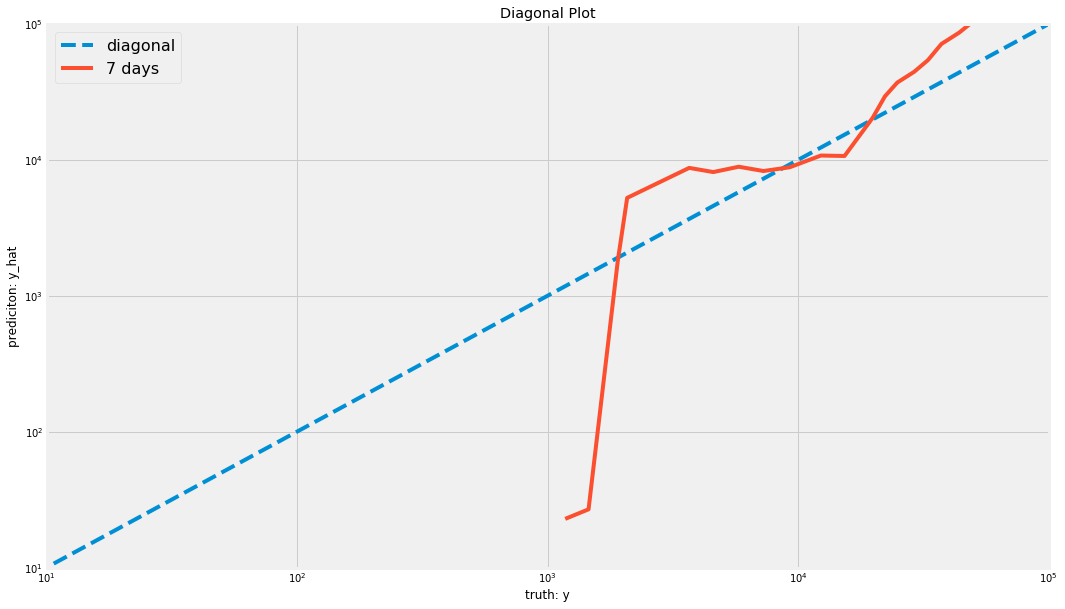

In [83]:

fig, ax = plt.subplots(1, 1)


ax.plot(np.arange(max(y)),np.arange(max(y)),'--',label='diagonal')
ax.plot(y,y_hat,'-',label=horizon)  # horizon is a np.timedelta objct

ax.set_title('Diagonal Plot')
ax.set_ylim(10, max(y))

ax.set_xlabel('truth: y')
ax.set_ylabel('prediciton: y_hat')
ax.set_yscale('log')

ax.set_xlim(10, max(y))
ax.set_xscale('log')
ax.legend(loc='best',
           prop={'size': 16});

# Trivial Forecast

 Example trivial forecast, prediciton 7 days into the future

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    ''' MAPE calculation '''
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [95]:
parse_dates=['date']
df_all = pd.read_csv('../data/processed/COVID_small_flat_table.csv',sep=';',parse_dates=parse_dates)
df_trivial=df_all[['date','Germany']]
df_trivial=df_trivial.rename(columns={'date': 'ds',
                        'Germany': 'y'})

### One of the standard forecast is a rolling mean 

An other standard forecast is the exponentially-weighted moving average,
see pandas.ewma

In [97]:
df_trivial['y_mean_r3']=df_trivial.y.rolling(3).mean() # take the average of 3 days

In [98]:
# the result has to be shifted according to the prediciton horizon (here 7 days)

df_trivial['cutoff']=df_trivial['ds'].shift(7)
df_trivial['y_hat']=df_trivial['y_mean_r3'].shift(7)
df_trivial['horizon']=df_trivial['ds']-df_trivial['cutoff']
print('MAPE: '+str(mean_absolute_percentage_error(df_trivial['y_hat'].iloc[12:,], df_trivial['y'].iloc[12:,])))
df_trivial

MAPE: 437.62995837158184


ds       y     y_mean_r3     cutoff         y_hat horizon
0  2020-01-22       0           NaN        NaT           NaN     NaT
1  2020-01-23       0           NaN        NaT           NaN     NaT
2  2020-01-24       0      0.000000        NaT           NaN     NaT
3  2020-01-25       0      0.000000        NaT           NaN     NaT
4  2020-01-26       0      0.000000        NaT           NaN     NaT
5  2020-01-27       1      0.333333        NaT           NaN     NaT
6  2020-01-28       4      1.666667        NaT           NaN     NaT
7  2020-01-29       4      3.000000 2020-01-22           NaN  7 days
8  2020-01-30       4      4.000000 2020-01-23           NaN  7 days
9  2020-01-31       5      4.333333 2020-01-24      0.000000  7 days
10 2020-02-01       8      5.666667 2020-01-25      0.000000  7 days
11 2020-02-02      10      7.666667 2020-01-26      0.000000  7 days
12 2020-02-03      12     10.000000 2020-01-27      0.333333  7 days
13 2020-02-04      12     11.333333 2020-01-28      1.666667  7 days
14 2020-02-05      12     12.000000 2020-01-29      3.000000  7 days
15 2020-02-06      12     12.000000 2020-01-30      4.000000  7 days
16 2020-02-07      13     12.333333 2020-01-31      4.333333  7 days
17 2020-02-08      13     12.666667 2020-02-01      5.666667  7 days
18 2020-02-09      14     13.333333 2020-02-02      7.666667  7 days
19 2020-02-10      14     13.666667 2020-02-03     10.000000  7 days
20 2020-02-11      16     14.666667 2020-02-04     11.333333  7 days
21 2020-02-12      16     15.333333 2020-02-05     12.000000  7 days
22 2020-02-13      16     16.000000 2020-02-06     12.000000  7 days
23 2020-02-14      16     16.000000 2020-02-07     12.333333  7 days
24 2020-02-15      16     16.000000 2020-02-08     12.666667  7 days
25 2020-02-16      16     16.000000 2020-02-09     13.333333  7 days
26 2020-02-17      16     16.000000 2020-02-10     13.666667  7 days
27 2020-02-18      16     16.000000 2020-02-11     14.666667  7 days
28 2020-02-19      16     16.000000 2020-02-12     15.333333  7 days
29 2020-02-20      16     16.000000 2020-02-13     16.000000  7 days
30 2020-02-21      16     16.000000 2020-02-14     16.000000  7 days
31 2020-02-22      16     16.000000 2020-02-15     16.000000  7 days
32 2020-02-23      16     16.000000 2020-02-16     16.000000  7 days
33 2020-02-24      16     16.000000 2020-02-17     16.000000  7 days
34 2020-02-25      17     16.333333 2020-02-18     16.000000  7 days
35 2020-02-26      27     20.000000 2020-02-19     16.000000  7 days
36 2020-02-27      46     30.000000 2020-02-20     16.000000  7 days
37 2020-02-28      48     40.333333 2020-02-21     16.000000  7 days
38 2020-02-29      79     57.666667 2020-02-22     16.000000  7 days
39 2020-03-01     130     85.666667 2020-02-23     16.000000  7 days
40 2020-03-02     159    122.666667 2020-02-24     16.000000  7 days
41 2020-03-03     196    161.666667 2020-02-25     16.333333  7 days
42 2020-03-04     262    205.666667 2020-02-26     20.000000  7 days
43 2020-03-05     482    313.333333 2020-02-27     30.000000  7 days
44 2020-03-06     670    471.333333 2020-02-28     40.333333  7 days
45 2020-03-07     799    650.333333 2020-02-29     57.666667  7 days
46 2020-03-08    1040    836.333333 2020-03-01     85.666667  7 days
47 2020-03-09    1176   1005.000000 2020-03-02    122.666667  7 days
48 2020-03-10    1457   1224.333333 2020-03-03    161.666667  7 days
49 2020-03-11    1908   1513.666667 2020-03-04    205.666667  7 days
50 2020-03-12    2078   1814.333333 2020-03-05    313.333333  7 days
51 2020-03-13    3675   2553.666667 2020-03-06    471.333333  7 days
52 2020-03-14    4585   3446.000000 2020-03-07    650.333333  7 days
53 2020-03-15    5795   4685.000000 2020-03-08    836.333333  7 days
54 2020-03-16    7272   5884.000000 2020-03-09   1005.000000  7 days
55 2020-03-17    9257   7441.333333 2020-03-10   1224.333333  7 days
56 2020-03-18   12327   9618.666667 2020-03-11   1513.666667  7 days
57 2020-0